D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


(88, 7)
(88, 1)


D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.3210613920694023
0.6894354243057965
2.7023414263330294


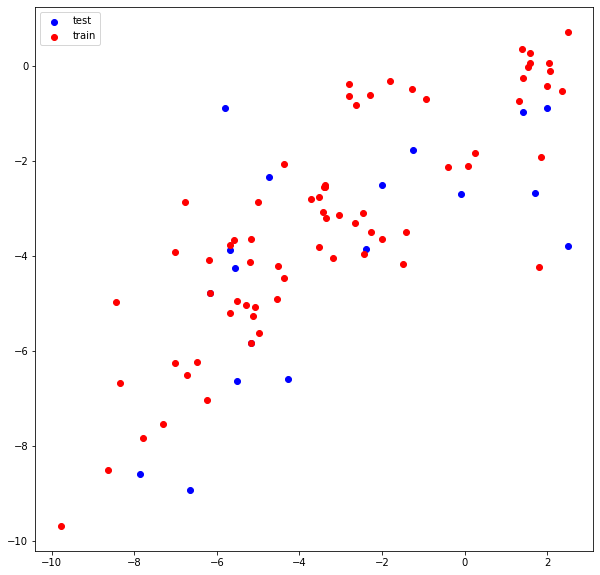

In [1]:
import numpy as np
import pandas as pd
import sklearn
import keras
import matplotlib.pyplot as plt
from keras.layers import Conv1D
from keras.layers.core import Flatten
from sklearn.preprocessing import StandardScaler
from keras.layers.core import Dense, Dropout, Activation
from sklearn.metrics import mean_squared_error
file = r'C:/Users/da070/Desktop/MRs.zhang/2.csv'
data = pd.read_csv(file)
data.columns = ['Volume', 'Formation Energy', 'Density', 'Band Gap (eV)', 'Space Group', 'Coordination of digits','Electronegativity','number']
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
x = data.drop(['number'],axis=1)
y = data[['number']]
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.2,random_state=18)
print(x.shape)
print(y.shape)
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(8,8,16), activation='relu',solver='adam',alpha=0.07,max_iter=460)
model.fit(x_train,y_train)
pre_test = model.predict(x_test)
pre_train = model.predict(x_train)
r2_score = ms.cross_val_score(model, x_test, y_test, cv=5, scoring='r2')
r2_score_train = ms.cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
print(r2_score)
print(r2_score_train)
rmse_tr_lr=mean_squared_error(y_test,pre_test,squared=False)
print(rmse_tr_lr)
plt.figure(figsize=(10,10))
plt.scatter(y_test,pre_test,color='blue',label='test') 
plt.scatter(y_train,pre_train,color='red',label='train')
plt.legend()  
y_test=pd.DataFrame(data=y_test)
pre_test=pd.DataFrame(data=pre_test)
pre_train=pd.DataFrame(data=pre_train)
#y_test.to_csv('F:/data2/RF1__test.csv')  
#pre_test.to_csv('F:/data2/RF1_pred.csv') 
pre_train.to_csv('F:/data3/MLP2_pred_train.csv') 
y_train.to_csv('F:/data3/MLP2__y_train.csv') 